In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data='../data/'
figures='../figures/'
# sns.set(rc={'figure.figsize':(4,3)})

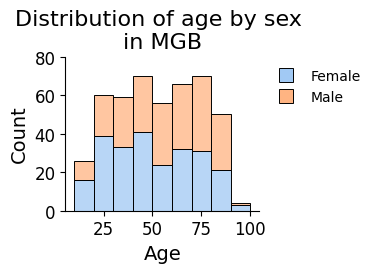

In [30]:
# 3a
mgb_dna_age=pd.read_csv(data+'figs/3a1.csv', index_col=None)
mgb_dna_age=mgb_dna_age[mgb_dna_age['cohort']=='MGB']

sns.reset_defaults()
fig=plt.figure(figsize=(2.5,2))
bin_edges = range(10, 101, 10)

palette = {'Female': sns.color_palette('pastel')[0], 'Male': sns.color_palette('pastel')[1]}
sns.histplot(data=mgb_dna_age, x='age', hue='sex', multiple="stack", stat="count",\
            palette=palette,linewidth=0.7, bins=bin_edges)
plt.ylim(0,80)
plt.yticks(np.arange(0,80.1,20), fontsize=12)
plt.xticks(fontsize=12)
plt.title('Distribution of age by sex \nin MGB', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 

markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10,linewidth=0.7, markeredgewidth=0.7,markeredgecolor='black',alpha=1, label=f'{group}') for group, color in palette.items()]
plt.legend(handles=markers,  bbox_to_anchor=(1, 1), frameon=False)
plt.savefig(figures+'3a1.png', bbox_inches='tight', dpi=300)
plt.show()


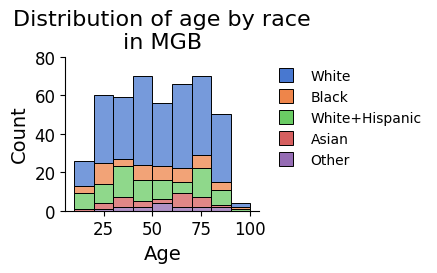

In [31]:
# 3a2

mgb_dna_age=pd.read_csv(data+'figs/3a2.csv', index_col=None)
mgb_dna_age=mgb_dna_age[mgb_dna_age['cohort']=='MGB']
sns.reset_defaults()
fig=plt.figure(figsize=(2.5,2))
bin_edges = range(10, 101, 10)

colors=sns.color_palette('muted', mgb_dna_age['race'].nunique())
palette = {r:c for r, c in zip(mgb_dna_age['race'].unique(), colors)}
sns.histplot(data=mgb_dna_age, x='age', hue='race', multiple="stack", stat="count",\
            palette=palette,linewidth=0.7, bins=bin_edges)
plt.ylim(0,80)
plt.yticks(np.arange(0,80.1,20), fontsize=12)
plt.xticks(fontsize=12)
plt.title('Distribution of age by race\nin MGB', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 

markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10,linewidth=0.7, markeredgewidth=0.7,markeredgecolor='black',alpha=1, label=f'{group}') for group, color in palette.items()]
plt.legend(handles=markers,  bbox_to_anchor=(1, 1), frameon=False)

plt.savefig(figures+'3a2.png', bbox_inches='tight', dpi=300)
plt.show()


/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_48472/2105668747.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  top_dna_all=pd.read_csv(data+'figs/3b.csv', index_col=None)


['MESA1' 'MESA2' 'PPMI' 'RA' 'Grady' 'GENOA']


/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_48472/2105668747.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Up-regulated','Down-regulated'], fontsize=14)


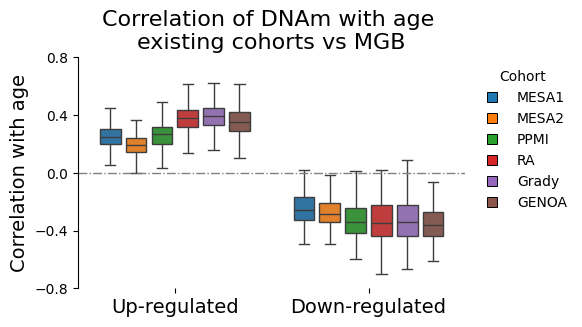

In [38]:
# 3b
top_dna_all=pd.read_csv(data+'figs/3b.csv', index_col=None)
sns.reset_defaults()
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
ax=sns.boxplot(data=top_dna_all,x='proposed',y='cor',hue='cohort', palette='tab10', showfliers=False, gap=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 

axes.set_xticklabels(['Up-regulated','Down-regulated'], fontsize=14)

plt.yticks(np.arange(-0.8,0.81,0.4))
plt.title('Correlation of DNAm with age \nexisting cohorts vs MGB', fontsize=16)
plt.ylabel('Correlation with age', fontsize=14)
plt.xlabel('')

markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=7,markeredgewidth=0.7,\
                      markeredgecolor='black',alpha=1, label=f'{group}') for group, color in \
           zip(top_dna_all['cohort'].unique(), sns.color_palette('tab10'))]
plt.legend(handles=markers, title='Cohort', bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(y=0, color='gray', linestyle='-.', linewidth=1)
plt.savefig(figures+'3b.png', bbox_inches='tight', dpi=300)
plt.show()

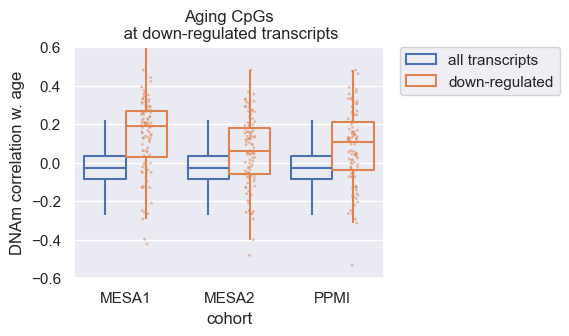

In [33]:
# 3f
pls=pd.read_csv(data+'figs/3f.csv',index_col=0)
direction='down-regulated'
sns.set(rc={'figure.figsize':(4,3)})
ax=sns.stripplot(data=pls.reset_index(),x='cohort',y='dot_plot',s=2,alpha=.5, dodge=True,hue='rna_c',legend=False, 
                 hue_order=['all transcripts',direction]);
ax=sns.boxplot(data=pls.reset_index(),x='cohort',y='cor', hue='rna_c',showfliers=False,fill=False, showcaps=False, 
               hue_order=['all transcripts',direction])
ax.set_yticks(ax.get_yticks());ax.set_xticks(ax.get_xticks());
ax.set(ylim=[-.6,.6],title='Aging CpGs\n at '+direction+' transcripts',ylabel='DNAm correlation w. age');
ax.legend_.set_title(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figures+'3f.png', bbox_inches='tight', dpi=300)
plt.show()

/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_48472/2377599091.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax=sns.barplot(data=pl, x='cohort',y='pp',hue='q',order=rna_cohort_order, palette=palette, width=0.85, gap=0.1, dodge=True)


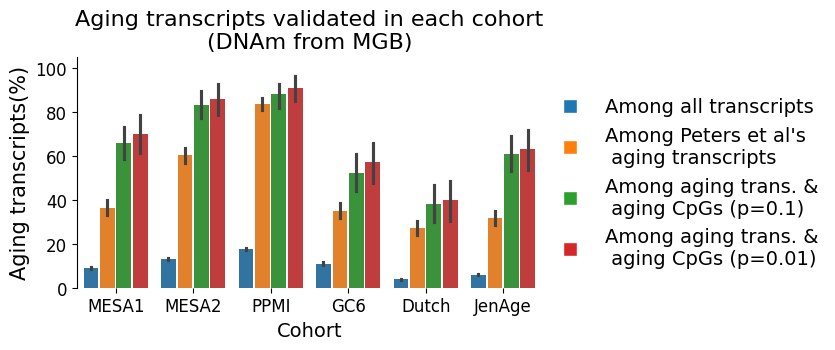

In [32]:
pl = pd.read_csv(data+'figs/3g.csv', index_col=None)
rna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'GC6', 'Dutch', 'JenAge']
sns.reset_defaults()
palette=sns.color_palette("tab10")
fig=plt.figure(figsize=(6, 3))
ax=sns.barplot(data=pl, x='cohort',y='pp',hue='q',order=rna_cohort_order, palette=palette, width=0.85, gap=0.1, dodge=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 
handles, labels = ax.get_legend_handles_labels()

markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, alpha=1, label=f'{l}') for l, color in zip(labels, palette)]
plt.legend(handles=markers, bbox_to_anchor=(0.98, 0.9), frameon=False, fontsize=14)

plt.title('Aging transcripts validated in each cohort\n(DNAm from MGB)', fontsize=16)
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('Aging transcripts(%)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim(0,1.05)
ax.set_yticks(np.arange(0, 1.05, 0.2))
ax.set_yticklabels(np.arange(0, 101, 20))

plt.savefig(figures+'3g.png', bbox_inches='tight', dpi=300)
plt.show()
